In [9]:
import sys
import os

sys.path.insert(0, os.path.abspath('../app'))

import importlib.util

spec = importlib.util.spec_from_file_location("mainapp", "../app/mainapp.py")
mainapp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mainapp)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [11]:
print("Hole Flugdaten...")
pd.set_option("display.width", 120)
pd.set_option("display.max_columns", 10)

raw_data = mainapp.fetch_flight_data("ZRH", "BCN")  # <-- Erst Flugdaten holen

df = mainapp.prepare_dataframe(raw_data)            # <-- Dann DataFrame erstellen
print("Erste Zeilen der Daten:")
print(df.head())                                    # <-- Erst jetzt df.head() aufrufen



Hole Flugdaten...
Erste Zeilen der Daten:
  Reisedatum  Preis (CHF)  Anzahl Transfers  Flugdauer (Minuten) Wochentag der Suche
0 2025-05-13           79                 1                  870            Saturday
1 2025-05-30          105                 0                  225           Wednesday
2 2025-09-10          106                 0                  225              Monday
3 2025-05-13          107                 1                 1325             Tuesday
4 2025-05-14          120                 0                  225            Thursday


In [12]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="date", y="price", data=df)
plt.title("Flugpreise ZRH → BCN (nächste 30 Tage)")
plt.xlabel("Datum")
plt.ylabel("Preis in EUR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `date` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

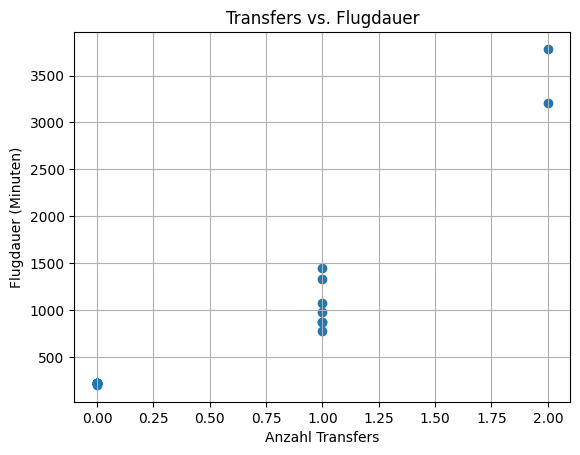

In [ ]:
plt.scatter(df["transfers"], df["duration_min"])
plt.xlabel("Anzahl Transfers")
plt.ylabel("Flugdauer (Minuten)")
plt.title("Transfers vs. Flugdauer")
plt.grid(True)
plt.show()

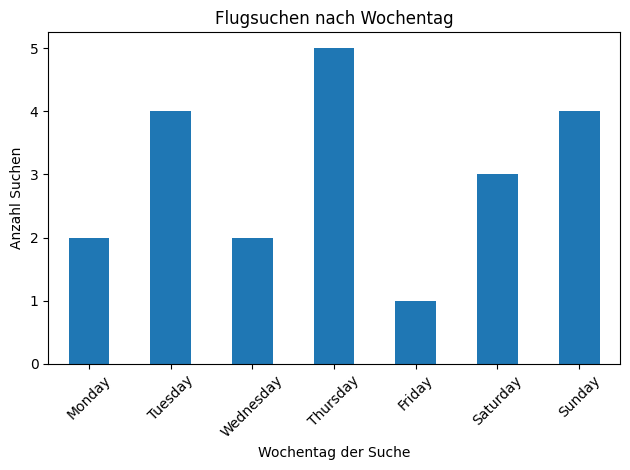

In [ ]:
# Häufigkeit von Flugsuchen pro Wochentag
# Richtige Reihenfolge der Wochentage
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Neu sortieren
day_counts = df["search_day"].value_counts()
day_counts = day_counts.reindex(weekday_order)

# Plot
day_counts.plot(kind="bar")
plt.title("Flugsuchen nach Wochentag")
plt.xlabel("Wochentag der Suche")
plt.ylabel("Anzahl Suchen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
weekday_avg = mainapp.compare_weekday_prices(df)
print("\nDurchschnittliche Preise pro Wochentag:")
print(weekday_avg.sort_values())



Durchschnittliche Preise pro Wochentag:
weekday
Tuesday       99.50
Sunday       136.00
Wednesday    171.00
Thursday     184.60
Friday       195.75
Saturday     203.50
Name: price, dtype: float64


In [ ]:
t, p = mainapp.run_statistical_test(df)

print(f"\n📊 t-Test Ergebnis:")
print(f"t-Wert: {t:.2f}")
print(f"p-Wert: {p:.4f}")

if p < 0.05:
    print("✅ Statistisch signifikanter Unterschied zwischen Montag und Freitag")
else:
    print("⚠️ Kein signifikanter Preisunterschied festgestellt")


🔍 Anzahl Flüge - Donnerstag: 5, Samstag: 2

📊 t-Test Ergebnis:
t-Wert: -1.23
p-Wert: 0.2831
⚠️ Kein signifikanter Preisunterschied festgestellt
